# Binary classification example

## Download and Unzip

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-01-02 20:55:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.207, 173.194.212.207, 142.251.162.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.7’

pizza_steak.zip.7   100%[===================>] 104.47M   240MB/s    in 0.4s    

2024-01-02 20:55:12 (240 MB/s) - ‘pizza_steak.zip.7’ saved [109540975/109540975]



## Inspect Data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


## Extract class names

In [6]:
import pathlib
import numpy as np
# Get the class names
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


## View an image

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


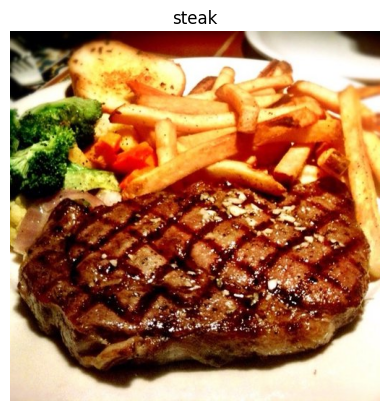

In [8]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

## Normalization

- normalize `rescale`


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1/255.)

## Create data batches `.flow_from_directory()`

- `batch_size`:
  - [There are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.](https://arxiv.org/pdf/1804.07612.pdf)
- `target_size`
- `class_mode`
- `seed`

In [10]:
# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary")

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [11]:
# Get a sample batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [12]:
# Get the first image
images[0], images[0].shape

(array([[[0.9333334 , 0.9058824 , 0.86666673],
         [0.92549026, 0.8862746 , 0.83921576],
         [0.94117653, 0.89019614, 0.8235295 ],
         ...,
         [0.08627451, 0.0509804 , 0.0627451 ],
         [0.10196079, 0.06666667, 0.07843138],
         [0.10588236, 0.0627451 , 0.07843138]],
 
        [[0.93725497, 0.9215687 , 0.87843144],
         [0.93725497, 0.8980393 , 0.85098046],
         [0.93725497, 0.8862746 , 0.8235295 ],
         ...,
         [0.10980393, 0.06666667, 0.08235294],
         [0.10588236, 0.05882353, 0.07450981],
         [0.1137255 , 0.06666667, 0.08235294]],
 
        [[0.9294118 , 0.91372555, 0.87843144],
         [0.9294118 , 0.8980393 , 0.854902  ],
         [0.9058824 , 0.85098046, 0.8000001 ],
         ...,
         [0.1254902 , 0.07843138, 0.08627451],
         [0.10980393, 0.0627451 , 0.07058824],
         [0.14509805, 0.09803922, 0.10588236]],
 
        ...,
 
        [[0.9333334 , 0.882353  , 0.85098046],
         [0.92549026, 0.8745099 , 0.84313

In [13]:
labels

array([1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

## Basic CNN Model

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 363ms/step - loss: 0.7711 - accuracy: 0.6393 - val_loss: 0.4889 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 7s 143ms/step - loss: 0.4475 - accuracy: 0.7953 - val_loss: 0.3735 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 7s 147ms/step - loss: 0.3479 - accuracy: 0.8580 - val_loss: 0.3309 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 6s 126ms/step - loss: 0.2101 - accuracy: 0.9260 - val_loss: 0.3883 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 7s 147ms/step - loss: 0.0992 - accuracy: 0.9733 - val_loss: 0.4009 - val_accuracy: 0.8300


### Cov2D layer

- The convolutional layers are the foundation of CNN, as they contain the learned kernels (weights), which extract features that distinguish different images from one another—this is what we want for classification!

- The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
  - filters - these are the number of "feature extractors" that will be moving over our images.
  - kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
  - stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
  - [padding](https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t/39371113#39371113) - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

📖: [A guide to convolution arithmetic for deep
learning.](https://arxiv.org/pdf/1603.07285.pdf)


### Overfitting in basic model:

In [15]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

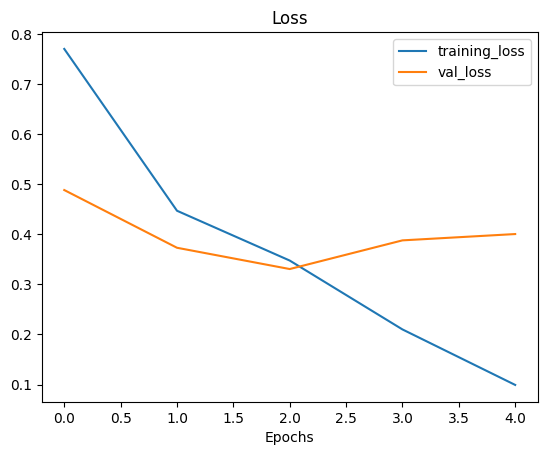

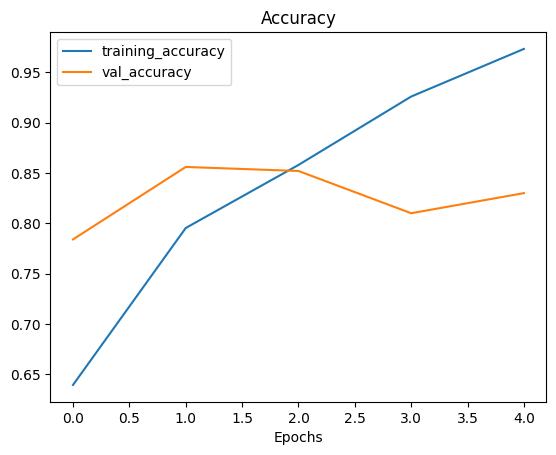

In [16]:
plot_loss_curves(history_1)

## Reduce Overfitting: CNN model with MaxPool2D layer

- The Max-Pooling slides the kernel (pool_size) with the specified stride over the input while only selecting the **largest value** at each kernel slice from the input to yield a value for the output.

- More computationally efficient and avoids overfitting: `pool_size` = (2,2) and stride = 2 (default: pool_size.) results in the discarding of 75% of activations (or further calcualtions). e.g., (60, 60) to (30, 30)



In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 148ms/step - loss: 0.5976 - accuracy: 0.6787 - val_loss: 0.4912 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 7s 136ms/step - loss: 0.4638 - accuracy: 0.7847 - val_loss: 0.3853 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4186 - accuracy: 0.8140 - val_loss: 0.3544 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3952 - accuracy: 0.8300 - val_loss: 0.3588 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 7s 144ms/step - loss: 0.3845 - accuracy: 0.8300 - val_loss: 0.3316 - val_accuracy: 0.8460


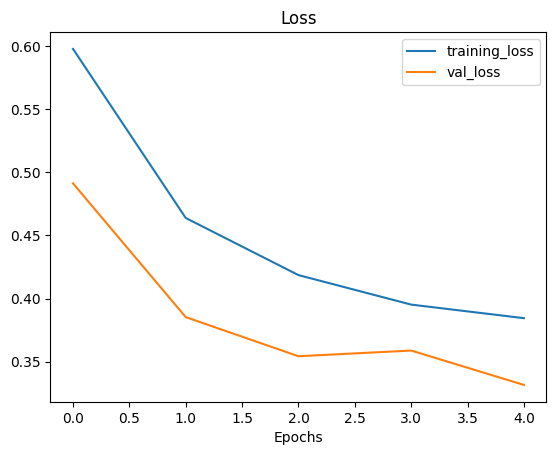

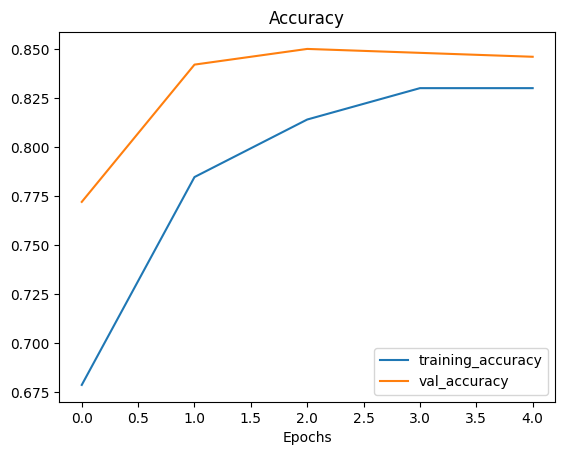

In [18]:
plot_loss_curves(history_2)

## Reduce Overfitting: Data Augmentation

- Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns.
- Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

- data augumentation (to reduce overfitting):
  - `rotation_range`
    - rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
  - `shear_range`
  - `zoom_range`
  - `width_shift_range`
  - `height_shift_range`
  - `horizontal_flip`

In [19]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  batch_size=32, # number of images to process at a time
                                                                  target_size=(224, 224), # convert all images to be 224 x 224
                                                                  class_mode="binary", # type of problem we're working on
                                                                  shuffle=False)

# use shuffle = Fasle to make sure the batches are the same in augmented data and non-augmented data
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               shuffle=False)

images, labels = train_data.next() # get the 'next' batch of images/labels
augmented_images, augmented_labels = train_data_augmented.next()
len(images), len(labels)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


(32, 32)

### Compare images before and after augmentation

- won't change the images in the directories
- images are only modified as they're loaded into the model

showing image number: 1


(-0.5, 223.5, 223.5, -0.5)

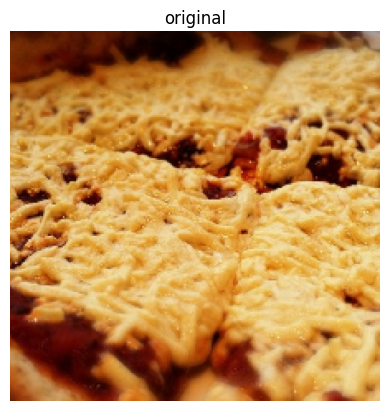

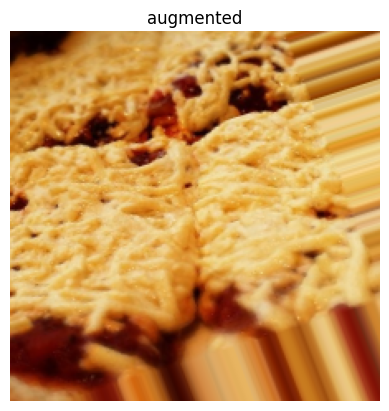

In [20]:
import random
random_number = random.randint(0, 32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"original")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented")
plt.axis(False)

## CNN Model with data augmentation

Here, when we created train_data_augmented, we turned off data shuffling using shuffle=False. This means that our model only sees **a batch of a single kind of images** at a time.

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. Thus, the training data performance doesn't improve. The validation data performance improves because it contains shuffled data.

In [21]:
# Create the model (same as model_2)
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 482ms/step - loss: 0.7498 - accuracy: 0.5400 - val_loss: 0.6915 - val_accuracy: 0.4980
Epoch 2/5
47/47 [==============================] - 25s 537ms/step - loss: 0.6915 - accuracy: 0.5207 - val_loss: 0.6874 - val_accuracy: 0.5920
Epoch 3/5
47/47 [==============================] - 23s 488ms/step - loss: 0.6886 - accuracy: 0.5247 - val_loss: 0.6757 - val_accuracy: 0.5280
Epoch 4/5
47/47 [==============================] - 23s 499ms/step - loss: 0.7136 - accuracy: 0.5180 - val_loss: 0.6985 - val_accuracy: 0.5020
Epoch 5/5
47/47 [==============================] - 22s 479ms/step - loss: 0.6916 - accuracy: 0.5713 - val_loss: 0.6717 - val_accuracy: 0.6940


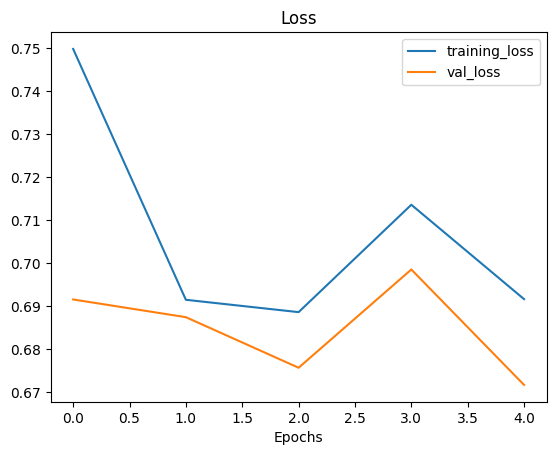

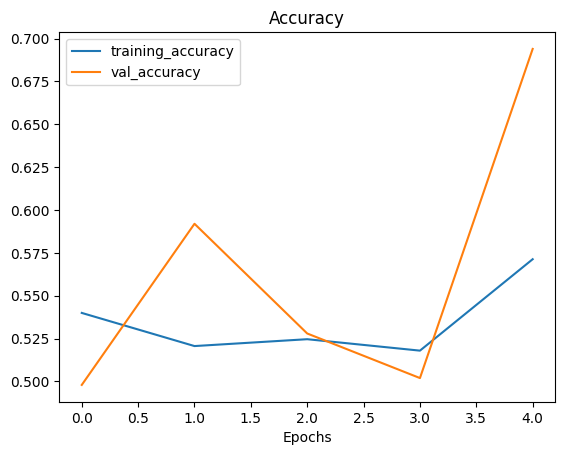

In [22]:
plot_loss_curves(history_3)

#### Model Clone

- Can also use `model_3 = tf.keras.models.clone_model(model_2)`.


## CNN Model with data augmentation (shuffled)

Both the training and the validation data performance improves steadily.

In [23]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size=32,
                                                                   target_size=(224,224),
                                                                   class_mode='binary',
                                                                   seed=42,
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [24]:
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 457ms/step - loss: 0.6522 - accuracy: 0.5980 - val_loss: 0.6005 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 23s 478ms/step - loss: 0.5719 - accuracy: 0.7033 - val_loss: 0.4636 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 23s 483ms/step - loss: 0.5287 - accuracy: 0.7453 - val_loss: 0.4140 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 23s 485ms/step - loss: 0.5032 - accuracy: 0.7687 - val_loss: 0.3753 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 23s 487ms/step - loss: 0.4779 - accuracy: 0.7727 - val_loss: 0.3525 - val_accuracy: 0.8580


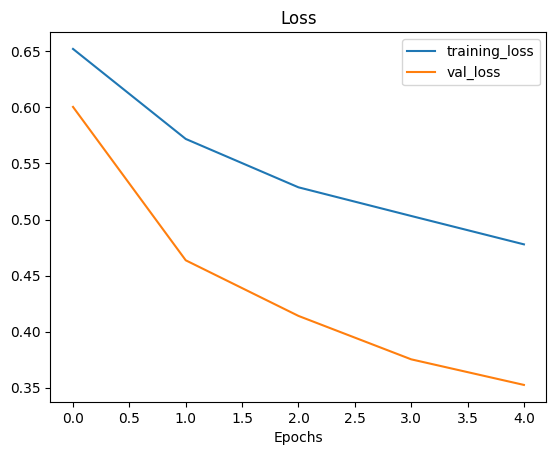

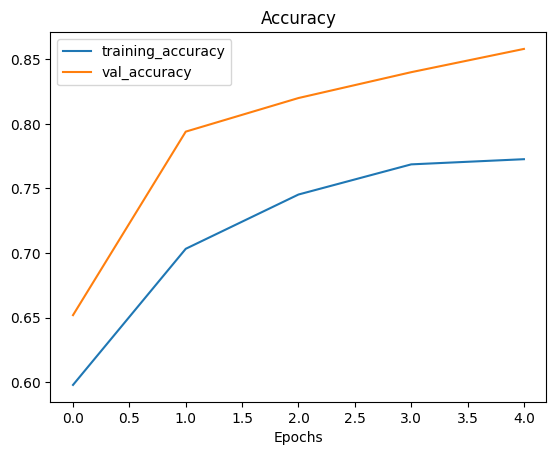

In [25]:
plot_loss_curves(history_4)

## CNN hyperparameter tuning

A few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.



## Prediction

--2024-01-02 21:02:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2024-01-02 21:02:24 (31.8 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



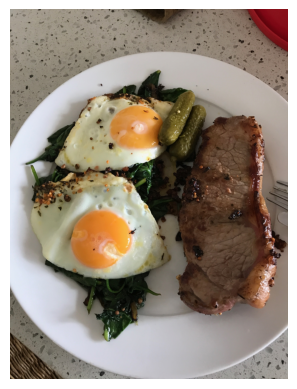

In [26]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [27]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

### preprocess the image to predict

- decode the image into a tensor
- ensure 3 colour channels
- resize
- normalize
- adding an extra dimension:
  - In reality, our model was trained on data in the shape of (batch_size, 224, 224, 3). We can fix this by adding an extra to our custom image tensor using tf.expand_dims.

> 🔑 **Note:** For your model to make predictions on unseen data, the custom image has to be in the same shape as your model has been trained on.

In [28]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [29]:
steak = load_and_prep_image("03-steak.jpeg")

In [30]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


### convert predictions probablity into their class names

In [31]:
pred = model_4.predict(steak)
pred

1/1 [==============================] - 0s 327ms/step


array([[0.8655486]], dtype=float32)

In [32]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

### A function to preprocess and convert predictions

In [33]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 21ms/step


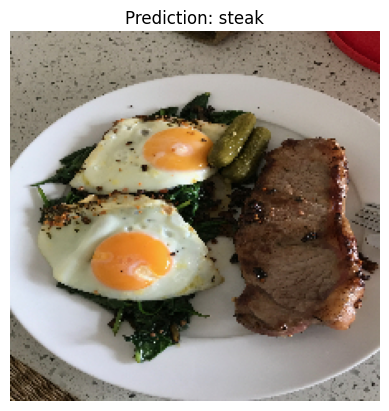

In [34]:
# Test our model on a custom image
pred_and_plot(model_4, "03-steak.jpeg", class_names)

--2024-01-02 21:02:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2024-01-02 21:02:29 (41.4 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]

1/1 [==============================] - 0s 18ms/step


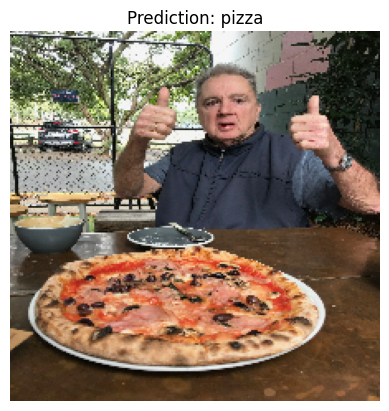

In [35]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_4, "03-pizza-dad.jpeg", class_names)

# Multi-class Image Classification

## Inspect Data

In [36]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-01-02 21:02:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.207, 142.250.98.207, 142.250.97.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   224MB/s    in 2.2s    

2024-01-02 21:02:32 (224 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [37]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [38]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [39]:
# Get the class names for our multi-class dataset
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


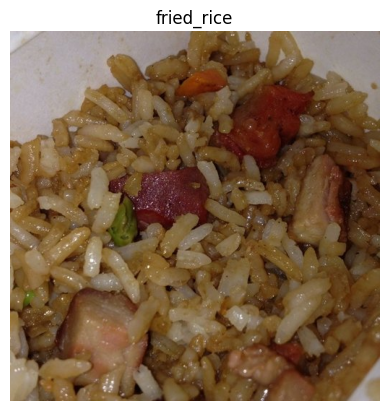

In [40]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

## Preprocess the data

In [41]:
# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=10,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True) # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Fit CNN model

In [42]:
# Create our model (a clone of model_8, except to be multi-class)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

model_5.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 151s 626ms/step - loss: 2.1862 - accuracy: 0.2024 - val_loss: 2.2255 - val_accuracy: 0.2132
Epoch 2/5
235/235 [==============================] - 152s 647ms/step - loss: 2.0603 - accuracy: 0.2696 - val_loss: 2.0380 - val_accuracy: 0.2792
Epoch 3/5
235/235 [==============================] - 143s 609ms/step - loss: 1.9893 - accuracy: 0.3039 - val_loss: 1.8746 - val_accuracy: 0.3508
Epoch 4/5
235/235 [==============================] - 152s 647ms/step - loss: 1.9211 - accuracy: 0.3291 - val_loss: 1.8164 - val_accuracy: 0.3716
Epoch 5/5
235/235 [==============================] - 149s 633ms/step - loss: 1.8863 - accuracy: 0.3416 - val_loss: 1.7844 - val_accuracy: 0.3752


## Check overfitting

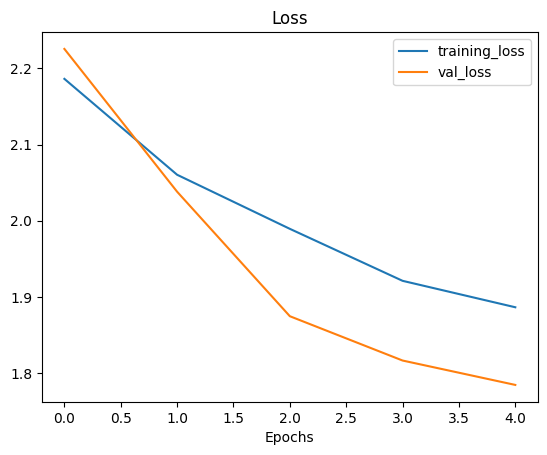

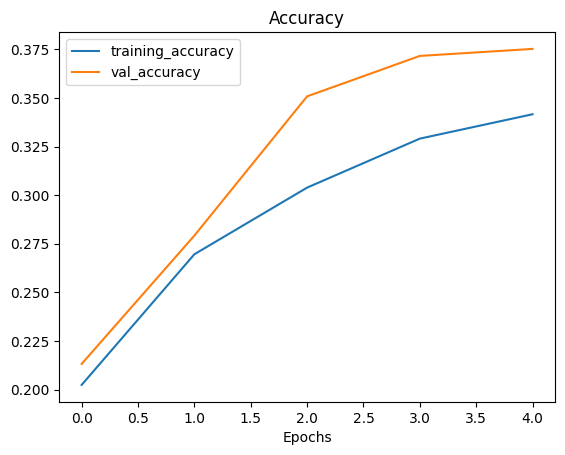

In [43]:
plot_loss_curves(history_5)

## Prediction

In [54]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  print(pred)

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred[0][0]))] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [45]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 22ms/step
[[0.06313737 0.06905789 0.03484796 0.0846331  0.12368324 0.14621718
  0.02973326 0.06554425 0.27684042 0.10630533]]


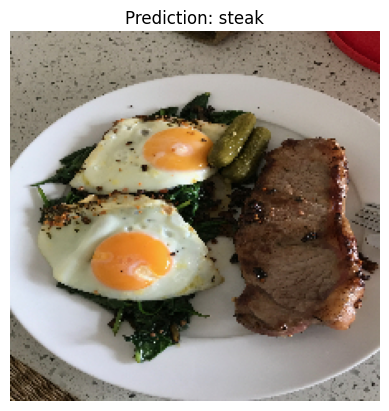

In [56]:
pred_and_plot(model_5,
              "03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 19ms/step
[[0.7569091]]


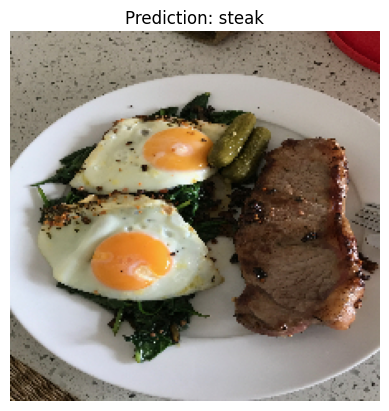

In [55]:
pred_and_plot(model_2,
              "03-steak.jpeg",
              class_names=['pizza', 'steak'])

## Save model

In [57]:
model_5.save("saved_trained_model_5")